**`COPYRIGHT(C) 2021 THE CYBER UNIVERSITY OF KOREA ALL RIGHTS RESERVED.`**

본 파일의 외부 배포를 금지합니다.

# 1번 과제 - numpy 텐서 다루기 (20점)

다음과 같은 2차원 행렬이 있다고 합시다.

$$
w=
\begin{bmatrix}
1 & 2 & 3\\ 
4 & 5 & 6 
\end{bmatrix}
$$

이것을 numpy tensor로 정의하면 다음과 같습니다.

```python
import numpy as np
w = np.array([
  [1., 2., 3.],
  [4., 5., 6.]
])
```

이번에는 `w`에서 `0,1`행, `1,2`열을 뽑아서 `v`에 넣어 봅시다.  

$$
w=
\left[
\begin{array}{ccc}
\begin{array}{c} 1\\ 4 \end{array} &
  \require{color}
  \colorbox{yellow}{$\begin{array}{cc}
    2 & 3 \\
    5 & 6
  \end{array}$}
\end{array}
\right] \to
v = \begin{bmatrix}
2 & 3\\ 
5 & 6 
\end{bmatrix}
$$ 

```python
v = w[0:2, 1:3] # python의 slice는 start:end+1의 형식입니다.
# 행 slice 0:2는 전체 행에 해당하므로 ':'로 대신할 수 있습니다.
# 열 slice 1:3은 1열부터 마지막 열까지이므로 '1:'로 대신할 수 있습니다.
v = w[:, 1:] 
```

이번에는 `v`의 전체 값을 두배로 하여 `u`에 저장합니다.

```python
u = 2*v
```

이번에는 `u`의 마지막 열에 1을 더해서 `a`에 저장합니다.

```python
a = u[:, 1:2] + 1
# python slice에서 -1은 마지막 줄임을 나타냅니다. 
# -2는 무엇을 의미하는 지 각자 실습해 봅시다.
a = u[:, -1:] + 1
```


**템플릿 A**

In [ ]:
import numpy as np
w = np.array([
  [1., 2., 3.],
  [4., 5., 6.]
])
ans01 = w.copy() # numpy 텐서의 복사
print(ans01)
v = w[:, 1:]
print(v)

u = 2*v
print(u)

a = u[:, -1:] + 1
ans02 = a.copy()
print(ans02)

[[1. 2. 3.]
 [4. 5. 6.]]
[[2. 3.]
 [5. 6.]]
[[ 4.  6.]
 [10. 12.]]
[[ 7.]
 [13.]]


**과제 기입란**

템플릿 A를 복사하여 아래의 코드셀에 붙여넣고 수정하는 과제입니다.  
아래의 cell에 다음과 같이 정의된 행렬을 numpy 텐서 `w`로 정의하고 출력해 보세요.

$$
\require{color}
w=\left[
\begin{array}{ccc}
0.1 & \begin{array}{ccc} 0.2 & 0.3 & 0.4 \end{array}\\
\begin{array}{c} 0.5\\ 0.9\\ 1.3\end{array} &
  \colorbox{yellow}{$\begin{array}{ccc}
    0.6 & 0.7 & 0.8\\
    1.0 & 1.1 & 1.2\\
    1.4 & 1.5 & 1.6
  \end{array}$}
\end{array}
\right]
$$  
`w`의 복사본을 `ans01`변수에 저장합니다.  
위 행렬에서 노란색 부분을 뽑아서 `v`에 저장합니다.  
v의 전체 값을 두배로 하여 u에 저장합니다.  
`u`의 **`1,2`행**(두번째, 세번째 행)에만 1을 더해서 `a`에 저장합니다.  
`a`의 복사본을 `ans02`변수에 저장합니다.  

In [ ]:
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#


# 2번 과제 - 행렬곱 (20점)  

행렬곱에 대해서는 강의 및 실습을 참조하시면 쉽게 numpy 텐서로 구현가능합니다.  

$$
w=
\begin{bmatrix}
1 & 2 \\ 
3 & 4  
\end{bmatrix},\ 
x = \begin{bmatrix}
5  \\ 
6   
\end{bmatrix}\\
y = wx =
\begin{bmatrix}
1 & 2 \\ 
3 & 4  
\end{bmatrix}
 \begin{bmatrix}
5  \\ 
6   
\end{bmatrix}=
\begin{bmatrix}
1\times 5 + 2\times 6 \\ 
3\times 5 + 4\times 6
\end{bmatrix}
= \begin{bmatrix}
17  \\ 
39   
\end{bmatrix}
$$

이제 $w$ 행렬 곱을 반복해서 계속 수행해 봅시다.  
`itertation 0:` $x = wx$  
`itertation 1:` $x = wx$  
`...`

이 과정을 반복하면 x의 값의 둘 중 하나, 혹은 둘 다 컴퓨터의 부동소수점을 초과하여 무한대(`inf`)가 됩니다.  
몇 번 정도 반복하면 무한대가 될 지 예상해 봅시다.  
(구체적으로 계산할 필요없이, 느낌으로만 추측합니다.)  

템플릿 B를 읽어보고 실행해 봅시다.  
n_iter의 수를 변경하면서 언제 `inf`가 발생하는 지 확인합시다.  


**템플릿 B**


In [ ]:
import numpy as np
w = np.array(
    [
        [1., 2.],
        [3., 4.]       
    ]
, dtype='float32')
x = np.array([5.,6.], dtype='float32')

n_iter = 1000
for i in range(n_iter):
    x = np.dot(w, x.T)
print(x)
print(x - x)    # inf를 연산하면 invalid값인 nan이 발생할 수 있습니다.

ans03 = 1000    # n_iter의 최소치 기입 'float32'의 경우 
ans04 = 10000   # n_iter의 최소치 기입 'float64'의 경우

[inf inf]
[nan nan]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


**과제 기입란**

템플릿 B를 복사하여 실험해 보세요.  
n_iter가 몇이 될 때 최초로 x의 원소 1개이상이 `inf`가 되는 지 확인합시다.  
데이터 타입이 `float64`인 경우에 대해서도 확인해 봅시다.  

`float32`일 때 최초로 한 개 이상 `inf`를 만드는 n_iter값을 `ans03`에 저장합니다.  
`float64`일 때 최초로 한 개 이상 `inf`를 만드는 n_iter값을 `ans04`에 저장합니다.  

In [ ]:
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#


이번에는 w와 x를 다음과 같이 정의합니다.  

$$
w=
\begin{bmatrix}
0.1 & 0.2 \\ 
0.3 & 0.4  
\end{bmatrix},\ 
x = \begin{bmatrix}
0.5  \\ 
0.6   
\end{bmatrix}
$$

위와 같은 행렬곱을 반복하더라도 inf나 nan이 발생하지 않습니다.   

우리가 딥러닝에서 영상의 값을 주로 0과 1사이로 정규화 하거나, 데이터의 값을 -1,1 사이로 정규화해서 사용하는 이유가 여기에 있습니다.  

각자 별도의 노트에서 실험해봅시다.

**많은 데이터를 한번에 처리하기**  

이번에는 x의 데이터가 한개가 아니고 여러개(3개)라고 합시다.

$$
w=
\begin{bmatrix}
1 & 2 \\ 
3 & 4  
\end{bmatrix},\ 
x = \left[
\begin{bmatrix} 5 \\ 6   \end{bmatrix}
\begin{bmatrix} 7 \\ 8   \end{bmatrix}
\begin{bmatrix} 9 \\ 0   \end{bmatrix}
\right]
$$

각각의 행렬곱을 한번에 계산하는 코드를 작성합시다. (`np.dot` 1회 사용)  
$$ y = wx $$  

`x`의 shape, `x.T`의 shape, `y`의 shape 등을 출력하고 비교해 봅시다.  

**과제 기입란**

위의 행렬곱을 구현하고, y의 값을 복사하여 `ans05` 변수에 저장합니다.

In [ ]:
# 여기에 코드를 완성합니다.
#
y = np.dot(w, x.T)
ans05 = y.copy()

# 3번 과제 - Affine 행렬을 이용한 회전 및 이동 (20점)

Affine 변환은 다음과 같습니다.  
$$
x' = Ax + b
$$
$A$는 shape의 회전, 확대, 축소, 반전 등을 담당하고 $b$는 위치의 이동을 담당합니다.   
$x$와 $x'$는 변환 전, 변환 후의 좌표를 나타냅니다. 좌표이므로 2개의 원소를 갖는 1차원 배열이 됩니다.   






**템플릿 C**

40960/28517 [===========================================] - 0s 0us/step
[[1.2 0.  0. ]
 [0.  1.2 0. ]]


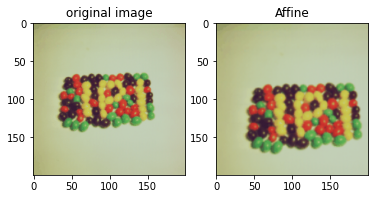

[[  0.  -1. 200.]
 [  1.   0.   0.]]


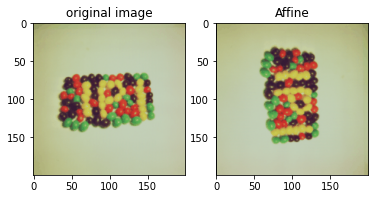

[[1. 0. 0.]
 [0. 1. 0.]]


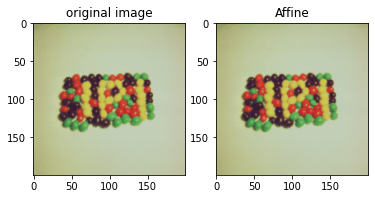

In [ ]:
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np

img_url = 'http://sipi.usc.edu/database/preview/misc/4.1.07.png'
filename = 'jelly.png'

img_path = keras.utils.get_file(filename, img_url)

src = cv2.imread(img_path)
image = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# 입력 텐서의 정의: 값을 [0..1]사이로 정규화한다. image/255. (레벨 정규화)
image = image/255.

# 1번 아핀 변환 행렬 (이 부분을 수정합니다.)
A = np.array(
 [ [ 1.2 , 0.0 ],
   [ 0.0,  1.2 ] ]
, dtype='float32')
b = np.array(
 [ [0. ],
   [0. ] ]
, dtype='float32')

# opencv용 아핀 변환 행렬 형식으로 변경
M = np.concatenate([A, b], axis=1)
print(M)

# 아핀 변환 수행
image_dst = cv2.warpAffine(image, M, (image.shape[1],image.shape[0]))

plt.subplot(121),plt.imshow(image),plt.title('original image')
plt.subplot(122),plt.imshow(image_dst),plt.title('Affine')
plt.show()

ans06 = M.copy()

# 2번 아핀 변환 행렬 (이 부분을 수정합니다.)
A = np.array(
 [ [ 0.0 , -1.0 ],
   [ 1.0,   0.0 ] ]
, dtype='float32')
b = np.array(
 [ [200. ],
   [0. ] ]
, dtype='float32')

# opencv용 아핀 변환 행렬 형식으로 변경
M = np.concatenate([A, b], axis=1)
print(M)

# 아핀 변환 수행
image_dst = cv2.warpAffine(image, M, (image.shape[1],image.shape[0]))

plt.subplot(121),plt.imshow(image),plt.title('original image')
plt.subplot(122),plt.imshow(image_dst),plt.title('Affine')
plt.show()

ans07 = M.copy()

# 3번 아핀 변환 행렬 (이 부분을 수정합니다.)
A = np.array(
 [ [ 1.0 , 0.0 ],
   [ 0.0,  1.0 ] ]
, dtype='float32')
b = np.array(
 [ [0. ],
   [0. ] ]
, dtype='float32')

# opencv용 아핀 변환 행렬 형식으로 변경
M = np.concatenate([A, b], axis=1)
print(M)

# 아핀 변환 수행
image_dst = cv2.warpAffine(image, M, (image.shape[1],image.shape[0]))

plt.subplot(121),plt.imshow(image),plt.title('original image')
plt.subplot(122),plt.imshow(image_dst),plt.title('Affine')
plt.show()

ans08 = M.copy()

ans09 = """
np.concatenate의 역할과
axis=1의 의미에 대해 간단히 적어봅시다.
"""

ans10 = """
subplot에서 121, 122의 의미에 대해 간단히 적어봅시다.
"""

In [ ]:
image.shape

(80, 80, 3)

**과제 기입란**  

첫번째 변환은 이미지를 1.2배 확대하는 Affine 변환 행렬을 만드는 것입니다.  
b가 0일 경우 확대는 잘 되지만 영상의 중심이 일치하지 않습니다.  
(첫번째 그림에서 확인하실 수 있습니다.)  
b를 적절히 조절하여 확대 전/후의 중심은 움직이지 않도록 합시다.  
변환 후, 이미지를 확인하고 `M`의 복사본을 `ans06` 변수에 저장합니다.

두번째 변환은 이미지를 사람이 보기에 시계 방향으로 90도 회전하는 것입니다.
b를 적절히 조절하지 않으면 이미지가 아예 그래프 바깥으로 벗어날 수 있습니다.  
변환 후, 이미지를 확인하고 `M`의 복사본을 `ans07` 변수에 저장합니다.

세번째 변환은 좌우 거울반전입니다.
b를 적절히 조절하지 않으면 이미지가 아예 그래프 바깥으로 벗어날 수 있습니다.  
변환 후, 이미지를 확인하고 `M`의 복사본을 `ans08` 변수에 저장합니다.  

numpy의 공식 설명서를 인터넷 검색하여 읽어보고, np.concatenate 함수의 역할과,
`axis=1`의 의미에 대해 간단하게 요약해서 적어봅시다.  
요약 텍스트를 `ans09` 변수에 저장합니다.  

matplotlib의 공식 설명서를 검색하여 읽어보고, `plt.subplot(121)`과
`plt.subplot(122)`에서 `121`과 `122`가 의미하는 것에 대해 한 줄로 요약해서 적어봅시다.
요약 텍스트를 `ans10` 변수에 저장합니다.

In [ ]:
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#



# 4번 과제 - position regression  (20점)

강의를 통하여 패턴의 종류를 판별하는 신경망을 만들어 보았습니다.
이번에는 패턴의 위치를 신경망을 이용하여 찾아봅시다.  

이미지는 28x28의 gray 영상입니다.  

```python
def load_data():
    n = 2000
    split = 0.8
    n_train = (int)(split*n)
    
    y = np.random.randint(28, size=(n,2))
    x = np.empty((n,28,28))
    
    for i in tqdm(range(n)):
        img = np.zeros((28,28))
        cv2.circle(img, (y[i][0],y[i][1]), 3, 255, -1)
        x[i] = img
    return ((x[:n_train], y[:n_train]), (x[n_train:], y[n_train:]))
```

`load_data` 함수를 이용하여 학습 및 테스트 용 이미지를 생성합니다.  
위의 코드를 읽고 이해해 봅시다.  

결과용 label(참값)도 동시에 생성합니다. Label `y`에는 각각 이미지의 점의 위치인 X-좌표와 Y-좌표가 기록되어 있습니다.  

템플릿 코드를 수행하여 이미지를 확인해 봅시다.  

**템플릿 D**

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 198702.13it/s]


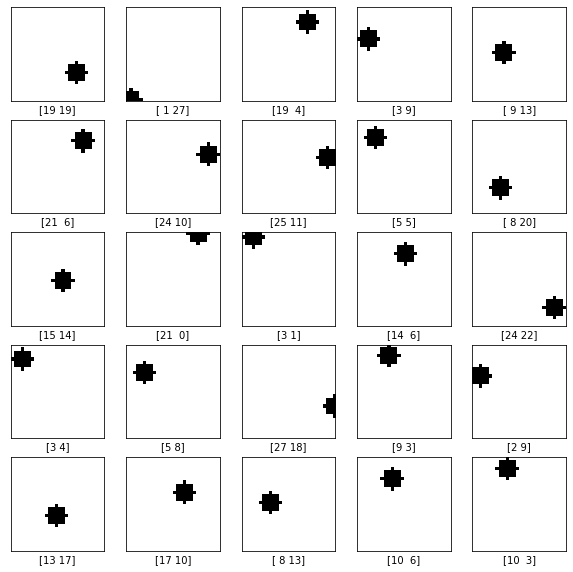

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 258       
Total params: 58,818
Trainable params: 58,818
Non-trainable params: 0
_________________________________________________________________


2022-09-15 10:22:58.872641: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200
31/50 [=================>............] - ETA: 0s - loss: 232.8501 - pos_accuracy: 0.0000e+00

2022-09-15 10:23:00.183246: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


50/50 [==============================] - 2s 10ms/step - loss: 211.5954 - pos_accuracy: 0.0000e+00 - val_loss: 118.9777 - val_pos_accuracy: 0.0024
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 53.9267 - pos_accuracy: 0.0100 - val_loss: 31.2818 - val_pos_accuracy: 0.0192
Epoch 3/200
50/50 [==============================] - 0s 2ms/step - loss: 28.4122 - pos_accuracy: 0.0237 - val_loss: 21.8321 - val_pos_accuracy: 0.0216
Epoch 4/200
50/50 [==============================] - 0s 3ms/step - loss: 17.0749 - pos_accuracy: 0.0444 - val_loss: 10.8427 - val_pos_accuracy: 0.0553
Epoch 5/200
50/50 [==============================] - 0s 3ms/step - loss: 7.1655 - pos_accuracy: 0.0956 - val_loss: 5.1051 - val_pos_accuracy: 0.1154
Epoch 6/200
50/50 [==============================] - 0s 3ms/step - loss: 3.6883 - pos_accuracy: 0.1912 - val_loss: 3.5312 - val_pos_accuracy: 0.2115
Epoch 7/200
50/50 [==============================] - 0s 3ms/step - loss: 2.6966 - pos_accuracy: 0.2256 

50/50 [==============================] - 0s 7ms/step - loss: 0.3206 - pos_accuracy: 0.5863 - val_loss: 0.6052 - val_pos_accuracy: 0.4736
Epoch 56/200
50/50 [==============================] - 0s 4ms/step - loss: 0.3151 - pos_accuracy: 0.6050 - val_loss: 0.5940 - val_pos_accuracy: 0.4904
Epoch 57/200
50/50 [==============================] - 0s 3ms/step - loss: 0.3080 - pos_accuracy: 0.6019 - val_loss: 0.5902 - val_pos_accuracy: 0.4880
Epoch 58/200
50/50 [==============================] - 0s 8ms/step - loss: 0.3029 - pos_accuracy: 0.6125 - val_loss: 0.5839 - val_pos_accuracy: 0.4880
Epoch 59/200
50/50 [==============================] - 0s 7ms/step - loss: 0.2984 - pos_accuracy: 0.6050 - val_loss: 0.5775 - val_pos_accuracy: 0.4952
Epoch 60/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2926 - pos_accuracy: 0.6175 - val_loss: 0.5718 - val_pos_accuracy: 0.4928
Epoch 61/200
50/50 [==============================] - 0s 3ms/step - loss: 0.2874 - pos_accuracy: 0.6219 - val_los

50/50 [==============================] - 0s 3ms/step - loss: 0.1435 - pos_accuracy: 0.7725 - val_loss: 0.4007 - val_pos_accuracy: 0.6082
Epoch 110/200
50/50 [==============================] - 0s 3ms/step - loss: 0.1420 - pos_accuracy: 0.7781 - val_loss: 0.3987 - val_pos_accuracy: 0.6058
Epoch 111/200
50/50 [==============================] - 0s 6ms/step - loss: 0.1395 - pos_accuracy: 0.7825 - val_loss: 0.3958 - val_pos_accuracy: 0.6130
Epoch 112/200
50/50 [==============================] - 0s 8ms/step - loss: 0.1379 - pos_accuracy: 0.7806 - val_loss: 0.3941 - val_pos_accuracy: 0.6250
Epoch 113/200
50/50 [==============================] - 0s 4ms/step - loss: 0.1363 - pos_accuracy: 0.7869 - val_loss: 0.3932 - val_pos_accuracy: 0.6202
Epoch 114/200
50/50 [==============================] - 0s 3ms/step - loss: 0.1346 - pos_accuracy: 0.7925 - val_loss: 0.3916 - val_pos_accuracy: 0.6202
Epoch 115/200
50/50 [==============================] - 0s 8ms/step - loss: 0.1328 - pos_accuracy: 0.7869 - v

50/50 [==============================] - 0s 3ms/step - loss: 0.0781 - pos_accuracy: 0.8863 - val_loss: 0.3173 - val_pos_accuracy: 0.7524
Epoch 164/200
50/50 [==============================] - 0s 2ms/step - loss: 0.0774 - pos_accuracy: 0.8863 - val_loss: 0.3157 - val_pos_accuracy: 0.7572
Epoch 165/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0765 - pos_accuracy: 0.8863 - val_loss: 0.3134 - val_pos_accuracy: 0.7452
Epoch 166/200
50/50 [==============================] - 0s 4ms/step - loss: 0.0758 - pos_accuracy: 0.8881 - val_loss: 0.3125 - val_pos_accuracy: 0.7572
Epoch 167/200
50/50 [==============================] - 0s 7ms/step - loss: 0.0748 - pos_accuracy: 0.8900 - val_loss: 0.3125 - val_pos_accuracy: 0.7548
Epoch 168/200
50/50 [==============================] - 0s 7ms/step - loss: 0.0742 - pos_accuracy: 0.8869 - val_loss: 0.3095 - val_pos_accuracy: 0.7572
Epoch 169/200
50/50 [==============================] - 0s 3ms/step - loss: 0.0735 - pos_accuracy: 0.8894 - v

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# 재현 가능한 난수 생성
np.random.seed(0)
tf.random.set_seed(0)

def load_data():
    n = 2000
    split = 0.8
    n_train = (int)(split*n)
    
    y = np.random.randint(28, size=(n,2))
    x = np.empty((n,28,28))
    
    for i in tqdm(range(n)):
        img = np.zeros((28,28))
        cv2.circle(img, (y[i][0],y[i][1]), 3, 255, -1)
        x[i] = img
    return ((x[:n_train], y[:n_train]), (x[n_train:], y[n_train:]))

def label(y):
    return np.around(y).astype('int')
        
(x_train, y_train), (x_test, y_test) = load_data()

# normalize image
x_train = x_train/255.
x_test = x_test/255.

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(str(label(y_test[i])))
plt.show()

def pos_accuracy(y_true, y_pred):
    label_true = tf.round(y_true)
    label_pred = tf.round(y_pred)
    is_correct = tf.reduce_all(label_true == label_pred, axis=1)
    is_correct = tf.cast(is_correct, 'float32')
    score = tf.reduce_mean(is_correct)
    return score

input_layer = Input((28, 28))
x = Flatten()(input_layer)
x = Dense(128, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
output_layer = Dense(2, activation = None)(x)
model = Model(input_layer, output_layer)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation=None)
])

summary_list = []
model.summary(print_fn=lambda x: summary_list.append(x))
for line in summary_list:
    print(line)

# learning_rate를 알맞게 변경해 봅시다.
# 적절한 학습 속도를 보장하면서도, 높은 정확도를 보이도록 튜닝합시다.  
model.compile(optimizer=SGD(learning_rate=0.001), loss='mse', metrics=[pos_accuracy])

# custom metric을 추가하고 batch_size와 epochs를 변경하면서 실험해 봅시다.
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 32, epochs=200)


# Dense 모델의 노드 수를 list형식으로 다음 변수에 기록합니다.
# 두 개의 은닉층을 사용하고 첫 은닉층의 노드 수가 32이고 두번째 은닉층의 노드 수가 64일 때:
ans11 = [32, 64] 

# 모델의 요약 string을 다음 변수에 기록합니다.
ans12 = summary_list

# learning_rate
ans13 = 0.001
# batch_size
ans14 = 64
# 학습 epoch 수
ans15 = 2
# 최종 val_loss 결과
ans16 = 54.7178
# 최종 val_accuracy 결과
ans17 = 0.91

ans18 = """
tf.reduce_all의 역할은 무엇인지, axis=1은 무엇을 의미하는 지 간단히 요약해 봅시다.
"""

ans19 = """
tf.reduce_mean은 코드에서 어떤 역할을 하는지, 간단히 요약해 봅시다. 
"""

ans20 = """
최종 출력층의 activation=None인 이유 
"""

ans21 = """
random seed의 사용 이유 
"""

**1. 모델의 구성**

템플릿에 표시된 위치에 Dense 레이어를 복수로 구성하여 봅시다.  
활성함수는 ReLU를 사용합니다.  

최종 레이어의 모습을 살펴 봅시다.
```python
output_layer = Dense(2, activation = None)(x)
```
출력은 X-좌표, Y-좌표의 두 위치 값이 출력되어야 하므로 최종레이어의 노드 수는 2입니다.  
분류기와 달리 활성함수를 사용하지 않았습니다. 그 이유에 대해 생각해 봅시다.  
만일 활성함수를 사용한다면, 학습 및 결과가 어떻게 달라지는 지 각자 실험해 봅시다.  

**2. custom metric의 구성**  

출력 결과가 연속적이므로 정확도를 정의하여 사용해 봅시다.  
추론치를 반올림하여 정수화 하고, 참값과 비교합니다.  
참값과 일치하는 갯수의 비율을 이 모델의 정확도(pos_accuracy)로 정의하겠습니다.  

모델과 손실함수(loss), 그리고 metric은 keras에서 구동되어야 하므로,
모두 keras(tensorflow)의 함수 및 텐서 들로 정의하여 사용하여야 합니다.  

다음의 샘플 코드를 이용하여 metric을 정의하고 테스트 해 봅시다.  

```python
def pos_accuracy_debug(y_true, y_pred):
    print(y_true.shape)
    label_true = tf.round(y_true)
    label_pred = tf.round(y_pred)
    is_correct = tf.reduce_all(label_true == label_pred, axis=1)
    print(is_correct.shape)
    print(is_correct.numpy())
    is_correct = tf.cast(is_correct, 'float32')
    print(is_correct.numpy())
    score = tf.reduce_mean(is_correct)
    return score

y_true_sample = tf.constant([[10.0, 10.0], [20.0, 20.0]], dtype='float32')
y_pred_sample = tf.constant([[10.0, 10.0], [20.0, 35.5]], dtype='float32')
score = pos_accuracy_debug(y_true_sample, y_pred_sample)
print(score.numpy())
```
 
metric은 두개의 argument를 받도록 되어 있습니다. `y_true`는 참값이고, `y_pred`는 추론값입니다.  
`pos_accuracy`함수를 읽고 직접 분석해 봅시다.  
필요하다면 `print`문을 활용하여 shape과 데이터 타입, 값을 직접 확인하면서 소스를 분석합시다.  
모르는 함수가 있다면 인터넷 검색을 활용합시다.  

custom metric 함수를 만들었다면 `model.compile`시에 적용해 봅시다.  
템플릿에서 accuracy를 출력할 수 있도록 다음의 코드로 변경합니다.  

```python
model.compile(optimizer=SGD(learning_rate=0.001), loss='mse', metrics=[pos_accuracy])
```

`model.fit()`이 수행되면서 추가된 metric이 출력되는 지 확인합시다.  

Keras 텐서의 디버깅을 위한 print의 사용법이 다소 다릅니다.
이 번에 정의한 metric은 별도로 테스트 하였습니다.
분명히 metric 함수는 `model.fit()`에서 반복적으로 호출되는 데에도 불구하고 함수 내의 `print` 출력이 정상적으로 되지는 않습니다. 모델이 실행되면서 정상적으로 출력되기 위해서는 `tf.print()`함수를 이용하여야 합니다. 이 함수를 이용하면, `tf.print()` 자체가 텐서의 흐름(그래프) 내에 기록되어서 원할한 출력을 하실 수 있습니다.  


**과제 기입란**  

탬플릿 D를 복사한 후에 수정하여 모델 구성 및 학습을 완성합니다.

최적의 정확도(val_pos_accuracy)가 산출될 수 있도록 모델을 구성합니다.
그러면서도 모델의 parameter 수는 작을 수록 좋습니다.  

구성한 dense layer의 노드 수를 `ans11`에 저장합니다. (손으로 기입하여 저장) 
model의 요약 string을 `ans12`에 저장합니다. (템플릿에 있는 코드를 그대로 사용하면 됩니다.)

적절히 조정한 최종 learning_rate, batch_size, epoch수를 `ans13`, `ans14`, `ans15`에 저장합니다. (손으로 기입하여 저장) 

최종 검증 데이터의 loss값과 정확도(val_pos_accuracy)를 `ans16`과 `ans17`에 기록합니다. (손으로 기입하여 저장)  

`pos_accuracy` metric 함수에서 `tf.reduce_all`은 무엇때문에 사용하였는지, `axis=1`은 무엇을 의미하는 지 간단히 분석해서 요약해 봅시다. (`ans18`에 저장)   

`tf.reduce_mean`은 무엇때문에 사용되었는지, 간단히 요약해 봅시다. (`ans19`에 저장)  

이번 모델의 최종 출력층에서 `activation=None`으로 설정한 이유를 간단히 요약해 봅시다. (`ans20`에 저장)  

이번 과제에서는 random seed를 사용합니다.  
random seed가 없다면 어떤 변화가 있는 지 실험해 봅시다.  
random seed를 사용하는 이유에 대해 간단히 요약해 봅시다. (`ans21`에 저장)  


In [ ]:
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#



# 5번 과제 - Convolution (20점)

다음은 keras의 텐서와 Conv2D 레이어 및 이를 이용한 모델을 활용하여 컨볼루션을 구현해보는 과제입니다.  

먼저 **템플릿 E**를 먼저 실행해 봅시다.  
box blur 필터를 이미지에 적용시키는 예제입니다.   
이미지를 읽어들이고 정규화하는 과정은 강의 내용과 동일합니다.  

다음은 keras의 텐서를 정의해 보겠습니다.

**1. 입력 데이터의 정의**  

```python
inputs = Input((80,80,3))
```

입력 데이터의 모양은 80x80 크기의 컬러이미지(채널 3)로 정의합니다.  
우리는 입력데이터의 모양을 정의하였으나, keras는 자동적으로 입력에 이러한 데이터가  
여러개 들어온다고 가정합니다. 

따라서 `inputs`의 shape은 `(None, 80, 80, 3)`이 됩니다.  
맨 앞의 `None`은 최종적으로 실행 시에 데이터의 갯수로 결정되는 숫자입니다.  
총 데이터(여기서는 이미지)의 갯수로서 가변으로 주어질 수 있다는 의미입니다.  

**2. 데이터의 처리1 - 채널별 분할**  

```python
inputs_r = inputs[:,:,:,0:1]
inputs_g = inputs[:,:,:,1:2]
inputs_b = inputs[:,:,:,2:3]
```

입력데이터를 3개의 텐서로 나누어 분할 합니다.  
RGB 채널 별 분리를 의미합니다.  
채널 index가 맨 마지막에 위치하므로 그것을 기준으로 분리합니다.

이 부분의 코드만 본다면 numpy 텐서의 연산과 동일하죠?  
하지만 놀랍게도 이 코드는 keras의 텐서 연산입니다.  
numpy, keras, pytorch의 텐서 연산은 상당히 유사합니다.  

**3. 데이터의 처리2 - 컨볼루션 필터의 정의**  

```python
box_blur = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1] ])/9.

def my_init(shape, dtype=None):
    # 커널용 텐서의 정의: (3,3,1,1) = (3x3)커널, 1개의 입력 채널, 1개의 출력 채널
    kernel_data = np.reshape(box_blur, (3,3,1,1))
    # numpy용 텐서를 keras 텐서로 변환
    kernel = tf.constant(kernel_data, dtype='float32')
    return kernel
```

box blur 필터를 이용한 keras 커널을 초기화 함수로 정의합니다.  
keras의 커널의 초기화 모양은 `shape`이라는 변수로 주어집니다.  
`shape`의 맨처음 두 개는 kernel의 크기를 나타내고,  
세번째 변수는 입력 채널의 수를 나타냅니다.  
네번째 변수는 출력 채널의 수를 나타냅니다.  
우리는 영상의 채널을 r,g,b로 각각 분리하여 출력할 것이므로 입력채널 = 1, 출력채널 = 1이 됩니다.  

numpy의 `reshape`함수를 이용하여 데이터의 shape을 변환합니다.  
마지막으로 numpy 텐서를 이용하여 keras텐서를 생성합니다. (`tf.constant` 함수 이용)  

**4. 데이터의 처리3 - 컨볼루션 레이어의 정의**  

컨볼루션을 처리하는 레이어를 정의합니다.  

```python
conv2d = Conv2D(filters=1, kernel_size=(3,3), padding='same', kernel_initializer=my_init, bias_initializer='zeros')
```

bias는 `0`을 사용할 것이므로 `zeros` initializer를 사용합니다.  
나머지 변수의 의미는 템플릿의 코드를 살펴 보도록 합시다.  

`filter`의 갯수를 `1`에서 `2`등으로 변경하면 오류가 발생합니다.  
직접 오류를 일으키고 오류의 메시지가 의미하는 바를 이해해 보려고 노력해 봅시다.  

**5. 데이터의 처리4 - 컨볼루션 처리**    

```py
outputs_r = conv2d(inputs_r)
outputs_g = conv2d(inputs_g)
outputs_b = conv2d(inputs_b)
```

RGB 채널 별로 각각 convolution을 처리합니다.  
아직 입력 데이터가 주어지지 않았으므로, 레이어의 동작만을 정의하게 됩니다.  

**6. 데이터의 처리5 - 채널 병합**   

```python
outputs = tf.concat([outputs_r, outputs_g, outputs_b], axis=3)
```
`tf.concat`을 사용하여 컨볼루션이 끝난 채널을 최종 출력 텐서로 병합합니다.  
여기에서 `axis=3`의 의미는 중요합니다.  

`(1, 80, 80, 1)` 텐서 3개가 있다고 합시다.  
`axis=0`으로 병합하면 모양이 `(3, 80, 80, 1)`이 됩니다.  
`axis=1`으로 병합하면 모양이 `(1, 240, 80, 1)`이 됩니다.  
`axis=3`으로 병합하면 모양이 `(1, 80, 80, 3)`이 됩니다.  

각각의 병합 시 데이터가 어떻게 될지 생각해 봅시다.  

https://www.tensorflow.org/api_docs/python/tf/concat  

위의 공식 매뉴얼을 읽어보고 example을 별도의 notebook에서 실험해 봅시다.  
인터넷에서 `tf.concat`의 example을 검색해 봅시다.  

스스로 매뉴얼과 검색을 통하여 사용법을 익히는 것은 가장 기본적인 학습법이라고 하겠습니다.  

**7. 데이터의 처리6 - 모델의 정의**  

```python
model = Model(inputs, outputs)
```

입력과 출력 텐서를 이용하여 keras 모델을 정의합니다.  
keras 텐서의 여러 데이터 처리 흐름은 모두 내부적으로 기록되어 있습니다.  
따라서 입력텐서와 출력텐서 만으로도 내부의 내이터 처리 흐름(**tensor의 flow**)이 정의 됩니다.  

전통적 프로그램과는 상당히 다른 구조입니다.
아래의 코드를 봅시다.

```python
# 일반 python 프로그램
inputs = 3
x = inputs * 7
x = x + 5
x = x * 2
outputs = x - 1

new_function = create_function(inputs, outputs) # ??????
```
우리는 통상적으로는 입력데이터와 출력데이터만을 가지고 함수를 정의 하기 어렵습니다.  
하지만 텐서를 이용한 모델은 이와 같은 구조로 되어 있다는 점이 흥미로운 점입니다. 


**8. 입력데이터를 만들고 실행하기**  

```python
x = np.array([image])
out_images = model(x)
```

입력 데이터를 생성합니다.  
하나의 이미지를 가진 입력데이터 셋을 만듭니다.  
그리고 모델을 수행하면 실행 결과가 출력됩니다.  
`x`와 `out_images`의 shape이 어떻게 되는 지 각자 확인해 봅시다.  

템플릿의 코드에는 numpy 텐서와 keras(tensorflow) 텐서가 혼재되어 있습니다.  
주로 입력 데이터에 numpy를 많이 사용하고, 출력데이터는 다시 `Tensor.numpy()`로 변환하여 확인하는 것이 보통의 사용법이라고 하겠습니다.  




**템플릿 E**

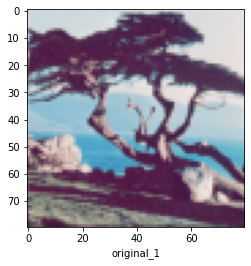

inputs.shape = (None, 80, 80, 3)
outputs.shape = (None, 80, 80, 3)


NameError: name 'image1' is not defined

In [4]:
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np

img_url = 'http://sipi.usc.edu/database/preview/misc/4.1.06.png'
filename = 'tree.png'

img_path = keras.utils.get_file(filename, img_url)

src = cv2.imread(img_path)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
# 영상을 80x80로 resize한다. (사이즈 정규화)
image = cv2.resize(src, dsize=(80, 80), interpolation=cv2.INTER_AREA)
# 입력 텐서의 정의: 값을 [0..1]사이로 정규화한다. image/255. (레벨 정규화)
image = image/255.

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image)
plt.xlabel('original_1')
plt.show()

box_blur = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1] ])/9.

def my_init(shape, dtype=None):
    # 커널용 텐서의 정의: (3,3,1,1) = (3x3)커널, 1개의 입력 채널, 1개의 출력 채널
    kernel_data = np.reshape(box_blur, (3,3,1,1))
    # numpy용 텐서를 keras 텐서로 변환
    kernel = tf.constant(kernel_data, dtype='float32')
    return kernel

# 입력은 80x80 영상 컬러 이미지(3개의 r,g,b채널)
inputs = Input((80,80,3))
print('inputs.shape =', inputs.shape)

# 채널 분리
# inputs의 shape = (1, 80, 80, 3)
# inputs_r의 shape = (1, 80, 80, 1)
inputs_r = inputs[:,:,:,0:1] # data_number(=1), height(=80), width(=80), first_channel
inputs_g = inputs[:,:,:,1:2] # data_number(=1), height(=80), width(=80), second_channel
inputs_b = inputs[:,:,:,2:3] # data_number(=1), height(=80), width(=80), third_channel

# 컨볼루션 정의
# filters: 필터의 갯수 1개
# kernel_size: 3x3 필터를 사용한다.
# padding='same': 출력 텐서의 크기를 입력 텐서와 동일하게 유지한다. (가장자리를 0으로 채움)
# kernel_initializer: 커널의 초기값을 설정. 
# bias_initializer: bias는 0을 사용한다.
conv2d = Conv2D(filters=1, kernel_size=(3,3), padding='same', kernel_initializer=my_init, bias_initializer='zeros')

# 컨볼루션 처리
outputs_r = conv2d(inputs_r)
outputs_g = conv2d(inputs_g)
outputs_b = conv2d(inputs_b)

# 채널 병합
outputs = tf.concat([outputs_r, outputs_g, outputs_b], axis=3) # 채널 축으로 병합
print('outputs.shape =', outputs.shape)

# keras 모델 정의: 입력텐서와 출력텐서를 이용하여 정의한다.
model = Model(inputs, outputs)

# 데이터로 목록화 한다. 입력데이터가 1개이므로: [ 입력이미지1 ]
# 만일 입력데이터가 2개일 경우에는 : [ 입력이미지1, 입력이미지2 ]의 모양이 된다.
# 이 과정은 여러개의 이미지를 한번에 convolution 하게하기 위한 기본과정이다.
x = np.array([image1, image2]) # make to data list

# 모델을 호출하여 컨볼루션 수행
out_images = model(x)

# 출력의 0번째에 첫번째 데이터가 저장되어 있다.
out_image1 = out_images[0].numpy()
out_image2 = out_images[1].numpy()

# 이미지 출력
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(out_image)
plt.xlabel('blur_1')
plt.show()


# 다음 코드는 첫번째 이미지 용입니다. 두번째 이미지로 변경합니다.
extract = x[0, 1:4, 1:4, 0]

avg = np.mean(extract)
print('9 pixles average =', avg)

# 다음 코드는 첫번째 이미지 용입니다. 두번째 이미지로 변경합니다.
conv2d_val = out_images[0, 2, 2, 0].numpy()
print('convolution result =', conv2d_val)

ans22 = conv2d_val

# 다음은 강의내용, 과제내용등에 대해 자유롭게 의견이나 느낀점을 적어주세요.
# 의견이 없으시면 공란으로 두셔도 무방합니다.

ans23 = """
여기에 적어주세요. 
"""

**과제 내용**  

템플릿을 복사하여 이미지 두개를 image1, image2로 읽어들입니다.  
image1용 url: `http://sipi.usc.edu/database/preview/misc/4.1.06.png`  
image2용 url: `http://sipi.usc.edu/database/preview/misc/4.1.07.png`  
읽어들인 이미지는 옆으로 나란히 출력해서 확인합니다. `subplot`함수 이용.   

입력 데이터를 두 개의 이미지로 주고, 한번에 컨볼루션을 수행합니다.
```python
x = np.array([image1, image2])
out_images = model(x)
```

컨볼루션이 수행된 이미지를 옆으로 나란히 출력해서 확인합니다.  

두 번째 입력 이미지의 다음 (3x3) 9개 픽셀의 R값이 저장된 numpy 데이터를 추출하고 출력해 봅니다.    
x좌표: (1..3)  # 두번째 좌표부터 네번째 좌표  
y좌표: (1..3)  # 두번째 좌표부터 네번째 좌표  

```python
extract = x[1, 1:4, 1:4, 0] 
print(extract)
```
추출된 영역의 평균값을 계산합니다.
```python
avg = np.mean(extract)
print(avg)
```
컨볼루션이 수행된 이미지의 2,2 좌표의 R값과 비교합니다.
```python
conv2d_val = out_images[1, 2, 2, 0].numpy()
print(conv2d_val)
```

`conv2d_val`을 `ans22`에 저장합니다.


In [ ]:
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#



# 과제 제출 방법

1. **런타임** -> **다시 시작 및 모두 실행**을 수행하여 정상적으로 결과가 출력되는 지 다시 한번 확인합니다.  

2. **수정** -> **모든 출력 지우기**를 선택하여 cell의 출력을 지웁니다.

3. **파일** -> **`.ipynb`** 다운로드를 선택하여 노트북을 다운로드 합니다.

4. 파일 이름을 학번으로 변경합니다. 예) `202099999.ipynb`

5. 노트북 파일을 제출하시면 됩니다.

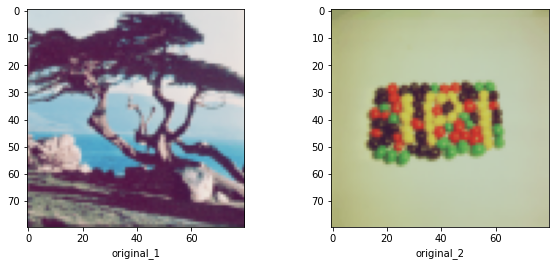

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


inputs.shape = (None, 80, 80, 3)
outputs.shape = (None, 80, 80, 3)


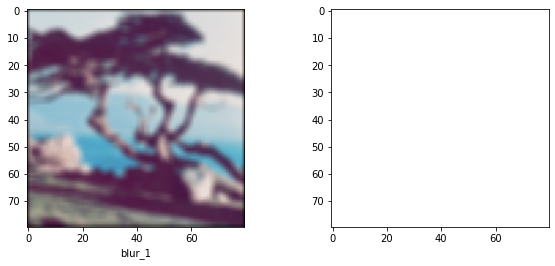

[[150. 150. 150.]
 [150. 150. 157.]
 [152. 157. 164.]]
9 pixles average = 153.33333333333334
convolution result = 153.33334


In [ ]:
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#
# 여기에 템플릿을 복사하고 수정하여 코드를 완성합니다.
#
from tensorflow import keras
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model
import numpy as np

img_url = 'http://sipi.usc.edu/database/preview/misc/4.1.06.png'
filename = 'image1.png'

img_path = keras.utils.get_file(filename, img_url)

image1 = cv2.imread(img_path)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
# 영상을 80x80로 resize한다. (사이즈 정규화)
image1 = cv2.resize(image1, dsize=(80, 80), interpolation=cv2.INTER_AREA)

# 입력 텐서의 정의: 값을 [0..1]사이로 정규화한다. image/255. (레벨 정규화)
image1 = image1/255.

img_url = 'http://sipi.usc.edu/database/preview/misc/4.1.07.png'
filename = 'image2.png'

img_path = keras.utils.get_file(filename, img_url)
image2 = cv2.imread(img_path)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image2 = cv2.resize(image2, dsize = (80,80), interpolation=cv2.INTER_AREA)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(image1)
plt.xlabel('original_1')
plt.subplot(122)
plt.imshow(image2)
plt.xlabel('original_2')
plt.show()




box_blur = np.array([[1, 1, 1],
                     [1, 1, 1],
                     [1, 1, 1] ])/9.

def my_init(shape, dtype=None):
    # 커널용 텐서의 정의: (3,3,1,1) = (3x3)커널, 1개의 입력 채널, 1개의 출력 채널
    kernel_data = np.reshape(box_blur, (3,3,1,1))
    # numpy용 텐서를 keras 텐서로 변환
    kernel = tf.constant(kernel_data, dtype='float32')
    return kernel

# 입력은 80x80 영상 컬러 이미지(3개의 r,g,b채널)
inputs = Input((80,80,3))
print('inputs.shape =', inputs.shape)

# 채널 분리
# inputs의 shape = (1, 80, 80, 3)
# inputs_r의 shape = (1, 80, 80, 1)
inputs_r = inputs[:,:,:,0:1] # data_number(=1), height(=80), width(=80), first_channel
inputs_g = inputs[:,:,:,1:2] # data_number(=1), height(=80), width(=80), second_channel
inputs_b = inputs[:,:,:,2:3] # data_number(=1), height(=80), width(=80), third_channel

# 컨볼루션 정의
# filters: 필터의 갯수 1개
# kernel_size: 3x3 필터를 사용한다.
# padding='same': 출력 텐서의 크기를 입력 텐서와 동일하게 유지한다. (가장자리를 0으로 채움)
# kernel_initializer: 커널의 초기값을 설정. 
# bias_initializer: bias는 0을 사용한다.
conv2d = Conv2D(filters=1, kernel_size=(3,3), padding='same', kernel_initializer=my_init, bias_initializer='zeros')

# 컨볼루션 처리
outputs_r = conv2d(inputs_r)
outputs_g = conv2d(inputs_g)
outputs_b = conv2d(inputs_b)

# 채널 병합
outputs = tf.concat([outputs_r, outputs_g, outputs_b], axis=3) # 채널 축으로 병합
print('outputs.shape =', outputs.shape)

# keras 모델 정의: 입력텐서와 출력텐서를 이용하여 정의한다.
model = Model(inputs, outputs)

# 데이터로 목록화 한다. 입력데이터가 1개이므로: [ 입력이미지1 ]
# 만일 입력데이터가 2개일 경우에는 : [ 입력이미지1, 입력이미지2 ]의 모양이 된다.
# 이 과정은 여러개의 이미지를 한번에 convolution 하게하기 위한 기본과정이다.
 # make to data list
x = np.array([image1, image2])
# 모델을 호출하여 컨볼루션 수행
out_images = model(x)

# 출력의 0번째에 첫번째 데이터가 저장되어 있다.
out_image1 = out_images[0].numpy()
out_image2 = out_images[1].numpy()

# 이미지 출력
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(out_image1)
plt.xlabel('blur_1')
plt.subplot(122)
plt.imshow(out_image2)
plt.show()

# 다음 코드는 첫번째 이미지 용입니다. 두번째 이미지로 변경합니다.
extract = x[1, 1:4, 1:4, 0] 
print(extract)

avg = np.mean(extract)
print('9 pixles average =', avg)

# 다음 코드는 첫번째 이미지 용입니다. 두번째 이미지로 변경합니다.
conv2d_val = out_images[1, 2, 2, 0].numpy()
print('convolution result =', conv2d_val)

ans22 = conv2d_val

# 다음은 강의내용, 과제내용등에 대해 자유롭게 의견이나 느낀점을 적어주세요.
# 의견이 없으시면 공란으로 두셔도 무방합니다.

ans23 = """
케라스, 텐서플로를 처음 공부해봅니다. 교수님 강의를 반복 시청하면서 모르는 코드가 나올 때마다 구글링하면서 조금씩 따라가려고 노력 중입니다. 
좋은 강의 감사드립니다. 
"""




